In [1]:
#參考資料
#https://youtu.be/crQkHHhY7aY 12分鐘cluster
#https://www.interactivebrokers.com/campus/ibkr-quant-news/hierarchical-clustering-in-python-a-comprehensive-implementation-guide-part-ii/

#https://youtu.be/0U9cs2V-Mqc 13分鐘heatmap

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib 顏色
#https://matplotlib.org/stable/users/explain/colors/colormaps.html 色條

#https://stackoverflow.com/questions/61816216/seaborn-clustermap-with-two-row-colors 兩條row_color


In [2]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
counts = pd.read_csv('metastasis.csv')
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
0,PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,...,6.98,6.34,7.04,7.42,6.78,6.75,6.95,6.81,6.85,7.31
1,BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,...,6.14,4.39,5.48,5.62,5.46,4.73,4.86,4.50,5.61,4.96
2,BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,...,5.47,3.53,5.79,3.94,5.43,3.01,4.90,5.88,5.01,5.28
3,BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,...,6.79,5.62,6.91,6.16,6.51,6.17,6.08,6.65,6.57,6.03
4,PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,...,6.60,5.01,5.77,4.73,5.97,4.80,5.23,5.57,5.37,5.05
5,STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,...,6.61,6.75,6.92,5.84,6.79,6.37,5.40,5.92,6.93,5.54
6,STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,...,6.29,6.10,4.83,5.94,5.31,6.13,5.48,5.38,5.91,5.87
7,BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,...,6.28,6.17,6.90,5.42,5.68,5.53,6.26,5.99,5.96,6.06
8,ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,...,6.66,7.54,7.53,7.20,7.85,6.88,6.52,6.72,7.70,6.77
9,PINK1,5.52,5.40,5.28,5.97,5.60,5.73,5.34,5.37,5.27,...,4.77,2.99,3.83,2.62,3.18,2.65,3.43,2.69,5.47,4.93


In [4]:
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
0,PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,...,6.98,6.34,7.04,7.42,6.78,6.75,6.95,6.81,6.85,7.31
1,BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,...,6.14,4.39,5.48,5.62,5.46,4.73,4.86,4.50,5.61,4.96
2,BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,...,5.47,3.53,5.79,3.94,5.43,3.01,4.90,5.88,5.01,5.28
3,BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,...,6.79,5.62,6.91,6.16,6.51,6.17,6.08,6.65,6.57,6.03
4,PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,...,6.60,5.01,5.77,4.73,5.97,4.80,5.23,5.57,5.37,5.05
5,STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,...,6.61,6.75,6.92,5.84,6.79,6.37,5.40,5.92,6.93,5.54
6,STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,...,6.29,6.10,4.83,5.94,5.31,6.13,5.48,5.38,5.91,5.87
7,BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,...,6.28,6.17,6.90,5.42,5.68,5.53,6.26,5.99,5.96,6.06
8,ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,...,6.66,7.54,7.53,7.20,7.85,6.88,6.52,6.72,7.70,6.77
9,PINK1,5.52,5.40,5.28,5.97,5.60,5.73,5.34,5.37,5.27,...,4.77,2.99,3.83,2.62,3.18,2.65,3.43,2.69,5.47,4.93


In [5]:
counts = counts.set_index('Gene Name')
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,7.01,...,6.98,6.34,7.04,7.42,6.78,6.75,6.95,6.81,6.85,7.31
BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,5.74,...,6.14,4.39,5.48,5.62,5.46,4.73,4.86,4.50,5.61,4.96
BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,5.08,...,5.47,3.53,5.79,3.94,5.43,3.01,4.90,5.88,5.01,5.28
BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,6.90,...,6.79,5.62,6.91,6.16,6.51,6.17,6.08,6.65,6.57,6.03
PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,5.91,...,6.60,5.01,5.77,4.73,5.97,4.80,5.23,5.57,5.37,5.05
STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,6.41,...,6.61,6.75,6.92,5.84,6.79,6.37,5.40,5.92,6.93,5.54
STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,5.28,...,6.29,6.10,4.83,5.94,5.31,6.13,5.48,5.38,5.91,5.87
BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,5.95,...,6.28,6.17,6.90,5.42,5.68,5.53,6.26,5.99,5.96,6.06
ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,6.80,...,6.66,7.54,7.53,7.20,7.85,6.88,6.52,6.72,7.70,6.77


In [6]:
counts = counts.T
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,6.48,6.02,4.88,6.76,5.51,7.00,5.07,5.94,7.12,5.52,5.11,6.06
Adjacent Kidney.1,6.72,5.89,5.15,6.40,6.37,6.68,5.69,5.34,7.48,5.40,6.02,5.90
Adjacent Kidney.2,6.56,6.18,5.45,6.17,6.64,6.76,6.01,5.36,7.27,5.28,5.47,6.21
Adjacent Kidney.3,6.30,6.61,5.75,6.72,5.82,7.32,5.13,5.73,7.83,5.97,6.33,6.38
Adjacent Kidney.4,6.60,6.02,5.20,6.86,5.69,6.95,5.01,6.06,7.02,5.60,5.37,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...
Metastasis CCRCC.17,6.75,4.73,3.01,6.17,4.80,6.37,6.13,5.53,6.88,2.65,4.78,4.39
Metastasis CCRCC.18,6.95,4.86,4.90,6.08,5.23,5.40,5.48,6.26,6.52,3.43,4.14,4.41
Metastasis CCRCC.19,6.81,4.50,5.88,6.65,5.57,5.92,5.38,5.99,6.72,2.69,2.36,4.41
Metastasis CCRCC.20,6.85,5.61,5.01,6.57,5.37,6.93,5.91,5.96,7.70,5.47,4.67,5.93


In [7]:
minvalue_series = counts.min() 
minvalue_series

Gene Name
PPP2CA    6.02
BECN1     4.39
BAK1      2.46
BCL2L1    5.62
PIK3CB    4.24
STRN4     4.90
STRN3     3.43
BAX       4.03
ULK1      4.24
PINK1     2.62
PRKN      0.00
STK24     3.43
dtype: float64

In [8]:
maxvalue_series = counts.max() 
maxvalue_series

Gene Name
PPP2CA    7.42
BECN1     6.61
BAK1      6.07
BCL2L1    7.82
PIK3CB    6.65
STRN4     7.32
STRN3     6.29
BAX       6.90
ULK1      8.01
PINK1     5.97
PRKN      6.43
STK24     6.44
dtype: float64

In [9]:
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,6.48,6.02,4.88,6.76,5.51,7.00,5.07,5.94,7.12,5.52,5.11,6.06
Adjacent Kidney.1,6.72,5.89,5.15,6.40,6.37,6.68,5.69,5.34,7.48,5.40,6.02,5.90
Adjacent Kidney.2,6.56,6.18,5.45,6.17,6.64,6.76,6.01,5.36,7.27,5.28,5.47,6.21
Adjacent Kidney.3,6.30,6.61,5.75,6.72,5.82,7.32,5.13,5.73,7.83,5.97,6.33,6.38
Adjacent Kidney.4,6.60,6.02,5.20,6.86,5.69,6.95,5.01,6.06,7.02,5.60,5.37,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...
Metastasis CCRCC.17,6.75,4.73,3.01,6.17,4.80,6.37,6.13,5.53,6.88,2.65,4.78,4.39
Metastasis CCRCC.18,6.95,4.86,4.90,6.08,5.23,5.40,5.48,6.26,6.52,3.43,4.14,4.41
Metastasis CCRCC.19,6.81,4.50,5.88,6.65,5.57,5.92,5.38,5.99,6.72,2.69,2.36,4.41
Metastasis CCRCC.20,6.85,5.61,5.01,6.57,5.37,6.93,5.91,5.96,7.70,5.47,4.67,5.93


In [10]:
counts = counts.T
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,7.01,...,6.98,6.34,7.04,7.42,6.78,6.75,6.95,6.81,6.85,7.31
BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,5.74,...,6.14,4.39,5.48,5.62,5.46,4.73,4.86,4.50,5.61,4.96
BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,5.08,...,5.47,3.53,5.79,3.94,5.43,3.01,4.90,5.88,5.01,5.28
BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,6.90,...,6.79,5.62,6.91,6.16,6.51,6.17,6.08,6.65,6.57,6.03
PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,5.91,...,6.60,5.01,5.77,4.73,5.97,4.80,5.23,5.57,5.37,5.05
STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,6.41,...,6.61,6.75,6.92,5.84,6.79,6.37,5.40,5.92,6.93,5.54
STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,5.28,...,6.29,6.10,4.83,5.94,5.31,6.13,5.48,5.38,5.91,5.87
BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,5.95,...,6.28,6.17,6.90,5.42,5.68,5.53,6.26,5.99,5.96,6.06
ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,6.80,...,6.66,7.54,7.53,7.20,7.85,6.88,6.52,6.72,7.70,6.77


In [11]:
for col in counts:
    counts[col] = (counts[col] - minvalue_series) / (maxvalue_series - minvalue_series)
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,0.328571,0.500000,0.385714,0.200000,0.414286,0.271429,0.600000,0.535714,0.642857,0.707143,...,0.685714,0.228571,0.728571,1.000000,0.542857,0.521429,0.664286,0.564286,0.592857,0.921429
BECN1,0.734234,0.675676,0.806306,1.000000,0.734234,0.725225,0.653153,0.761261,0.734234,0.608108,...,0.788288,0.000000,0.490991,0.554054,0.481982,0.153153,0.211712,0.049550,0.549550,0.256757
BAK1,0.670360,0.745152,0.828255,0.911357,0.759003,0.673130,0.689751,0.587258,0.642659,0.725762,...,0.833795,0.296399,0.922438,0.409972,0.822715,0.152355,0.675900,0.947368,0.706371,0.781163
BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,0.581818,...,0.531818,0.000000,0.586364,0.245455,0.404545,0.250000,0.209091,0.468182,0.431818,0.186364
PIK3CB,0.526971,0.883817,0.995851,0.655602,0.601660,0.751037,0.925311,0.456432,0.767635,0.692946,...,0.979253,0.319502,0.634855,0.203320,0.717842,0.232365,0.410788,0.551867,0.468880,0.336100
STRN4,0.867769,0.735537,0.768595,1.000000,0.847107,0.809917,0.756198,0.710744,0.694215,0.623967,...,0.706612,0.764463,0.834711,0.388430,0.780992,0.607438,0.206612,0.421488,0.838843,0.264463
STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,0.646853,...,1.000000,0.933566,0.489510,0.877622,0.657343,0.944056,0.716783,0.681818,0.867133,0.853147
BAX,0.665505,0.456446,0.463415,0.592334,0.707317,0.515679,0.721254,0.400697,0.846690,0.668990,...,0.783972,0.745645,1.000000,0.484321,0.574913,0.522648,0.777003,0.682927,0.672474,0.707317
ULK1,0.763926,0.859416,0.803714,0.952255,0.737401,0.809019,0.782493,0.880637,0.671088,0.679045,...,0.641910,0.875332,0.872679,0.785146,0.957560,0.700265,0.604775,0.657825,0.917772,0.671088


In [12]:
counts = counts.reset_index(drop=False)
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Metastasis CCRCC.12,Metastasis CCRCC.13,Metastasis CCRCC.14,Metastasis CCRCC.15,Metastasis CCRCC.16,Metastasis CCRCC.17,Metastasis CCRCC.18,Metastasis CCRCC.19,Metastasis CCRCC.20,Metastasis CCRCC.21
0,PPP2CA,0.328571,0.500000,0.385714,0.200000,0.414286,0.271429,0.600000,0.535714,0.642857,...,0.685714,0.228571,0.728571,1.000000,0.542857,0.521429,0.664286,0.564286,0.592857,0.921429
1,BECN1,0.734234,0.675676,0.806306,1.000000,0.734234,0.725225,0.653153,0.761261,0.734234,...,0.788288,0.000000,0.490991,0.554054,0.481982,0.153153,0.211712,0.049550,0.549550,0.256757
2,BAK1,0.670360,0.745152,0.828255,0.911357,0.759003,0.673130,0.689751,0.587258,0.642659,...,0.833795,0.296399,0.922438,0.409972,0.822715,0.152355,0.675900,0.947368,0.706371,0.781163
3,BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,...,0.531818,0.000000,0.586364,0.245455,0.404545,0.250000,0.209091,0.468182,0.431818,0.186364
4,PIK3CB,0.526971,0.883817,0.995851,0.655602,0.601660,0.751037,0.925311,0.456432,0.767635,...,0.979253,0.319502,0.634855,0.203320,0.717842,0.232365,0.410788,0.551867,0.468880,0.336100
5,STRN4,0.867769,0.735537,0.768595,1.000000,0.847107,0.809917,0.756198,0.710744,0.694215,...,0.706612,0.764463,0.834711,0.388430,0.780992,0.607438,0.206612,0.421488,0.838843,0.264463
6,STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,...,1.000000,0.933566,0.489510,0.877622,0.657343,0.944056,0.716783,0.681818,0.867133,0.853147
7,BAX,0.665505,0.456446,0.463415,0.592334,0.707317,0.515679,0.721254,0.400697,0.846690,...,0.783972,0.745645,1.000000,0.484321,0.574913,0.522648,0.777003,0.682927,0.672474,0.707317
8,ULK1,0.763926,0.859416,0.803714,0.952255,0.737401,0.809019,0.782493,0.880637,0.671088,...,0.641910,0.875332,0.872679,0.785146,0.957560,0.700265,0.604775,0.657825,0.917772,0.671088
9,PINK1,0.865672,0.829851,0.794030,1.000000,0.889552,0.928358,0.811940,0.820896,0.791045,...,0.641791,0.110448,0.361194,0.000000,0.167164,0.008955,0.241791,0.020896,0.850746,0.689552


In [13]:
# list(counts.columns.values)

In [14]:
columns_name = counts.columns.tolist()
print(columns_name)

['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney.1', 'Adjacent Kidney.2', 'Adjacent Kidney.3', 'Adjacent Kidney.4', 'Adjacent Kidney.5', 'Adjacent Kidney.6', 'Adjacent Kidney.7', 'Adjacent Kidney.8', 'Adjacent Kidney.9', 'Adjacent Kidney.10', 'Adjacent Kidney.11', 'Adjacent Kidney.12', 'Adjacent Kidney.13', 'Adjacent Kidney.14', 'Adjacent Kidney.15', 'Adjacent Kidney.16', 'Adjacent Kidney.17', 'Adjacent Kidney.18', 'Adjacent Kidney.19', 'Adjacent Kidney.20', 'Adjacent Kidney.21', 'Adjacent Kidney.22', 'Adjacent Kidney.23', 'Adjacent Kidney.24', 'Adjacent Kidney.25', 'Adjacent Kidney.26', 'Adjacent Kidney.27', 'Adjacent Kidney.28', 'Adjacent Kidney.29', 'Adjacent Kidney.30', 'Adjacent Kidney.31', 'Adjacent Kidney.32', 'Adjacent Kidney.33', 'Adjacent Kidney.34', 'Adjacent Kidney.35', 'Adjacent Kidney.36', 'Adjacent Kidney.37', 'Adjacent Kidney.38', 'Adjacent Kidney.39', 'Adjacent Kidney.40', 'Adjacent Kidney.41', 'Adjacent Kidney.42', 'Adjacent Kidney.43', 'Adjacent Kidney.44', 'Adjacen

In [15]:
#去掉index尾端的' '
for i in range(len(columns_name)):
    k = columns_name[i].split(".")
    if k[0][-1] == " ":
        k[0] = k[0][:-1]
    columns_name[i] = k[0]
print(counts.columns)

Index(['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney.1',
       'Adjacent Kidney.2', 'Adjacent Kidney.3', 'Adjacent Kidney.4',
       'Adjacent Kidney.5', 'Adjacent Kidney.6', 'Adjacent Kidney.7',
       'Adjacent Kidney.8', 'Adjacent Kidney.9', 'Adjacent Kidney.10',
       'Adjacent Kidney.11', 'Adjacent Kidney.12', 'Adjacent Kidney.13',
       'Adjacent Kidney.14', 'Adjacent Kidney.15', 'Adjacent Kidney.16',
       'Adjacent Kidney.17', 'Adjacent Kidney.18', 'Adjacent Kidney.19',
       'Adjacent Kidney.20', 'Adjacent Kidney.21', 'Adjacent Kidney.22',
       'Adjacent Kidney.23', 'Adjacent Kidney.24', 'Adjacent Kidney.25',
       'Adjacent Kidney.26', 'Adjacent Kidney.27', 'Adjacent Kidney.28',
       'Adjacent Kidney.29', 'Adjacent Kidney.30', 'Adjacent Kidney.31',
       'Adjacent Kidney.32', 'Adjacent Kidney.33', 'Adjacent Kidney.34',
       'Adjacent Kidney.35', 'Adjacent Kidney.36', 'Adjacent Kidney.37',
       'Adjacent Kidney.38', 'Adjacent Kidney.39', 'Adjacent Kidney.40',

In [16]:
#把每個index後面的小數點去掉
if len(columns_name) == len(counts.columns):
    counts.columns = columns_name
print(counts.columns)

Index(['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', '

In [17]:
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,...,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC
0,PPP2CA,0.328571,0.500000,0.385714,0.200000,0.414286,0.271429,0.600000,0.535714,0.642857,...,0.685714,0.228571,0.728571,1.000000,0.542857,0.521429,0.664286,0.564286,0.592857,0.921429
1,BECN1,0.734234,0.675676,0.806306,1.000000,0.734234,0.725225,0.653153,0.761261,0.734234,...,0.788288,0.000000,0.490991,0.554054,0.481982,0.153153,0.211712,0.049550,0.549550,0.256757
2,BAK1,0.670360,0.745152,0.828255,0.911357,0.759003,0.673130,0.689751,0.587258,0.642659,...,0.833795,0.296399,0.922438,0.409972,0.822715,0.152355,0.675900,0.947368,0.706371,0.781163
3,BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,...,0.531818,0.000000,0.586364,0.245455,0.404545,0.250000,0.209091,0.468182,0.431818,0.186364
4,PIK3CB,0.526971,0.883817,0.995851,0.655602,0.601660,0.751037,0.925311,0.456432,0.767635,...,0.979253,0.319502,0.634855,0.203320,0.717842,0.232365,0.410788,0.551867,0.468880,0.336100
5,STRN4,0.867769,0.735537,0.768595,1.000000,0.847107,0.809917,0.756198,0.710744,0.694215,...,0.706612,0.764463,0.834711,0.388430,0.780992,0.607438,0.206612,0.421488,0.838843,0.264463
6,STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,...,1.000000,0.933566,0.489510,0.877622,0.657343,0.944056,0.716783,0.681818,0.867133,0.853147
7,BAX,0.665505,0.456446,0.463415,0.592334,0.707317,0.515679,0.721254,0.400697,0.846690,...,0.783972,0.745645,1.000000,0.484321,0.574913,0.522648,0.777003,0.682927,0.672474,0.707317
8,ULK1,0.763926,0.859416,0.803714,0.952255,0.737401,0.809019,0.782493,0.880637,0.671088,...,0.641910,0.875332,0.872679,0.785146,0.957560,0.700265,0.604775,0.657825,0.917772,0.671088
9,PINK1,0.865672,0.829851,0.794030,1.000000,0.889552,0.928358,0.811940,0.820896,0.791045,...,0.641791,0.110448,0.361194,0.000000,0.167164,0.008955,0.241791,0.020896,0.850746,0.689552


In [18]:
#以下開始做圖

In [19]:
counts = counts.set_index('Gene Name')
counts

,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,...,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC,Metastasis CCRCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,0.328571,0.500000,0.385714,0.200000,0.414286,0.271429,0.600000,0.535714,0.642857,0.707143,...,0.685714,0.228571,0.728571,1.000000,0.542857,0.521429,0.664286,0.564286,0.592857,0.921429
BECN1,0.734234,0.675676,0.806306,1.000000,0.734234,0.725225,0.653153,0.761261,0.734234,0.608108,...,0.788288,0.000000,0.490991,0.554054,0.481982,0.153153,0.211712,0.049550,0.549550,0.256757
BAK1,0.670360,0.745152,0.828255,0.911357,0.759003,0.673130,0.689751,0.587258,0.642659,0.725762,...,0.833795,0.296399,0.922438,0.409972,0.822715,0.152355,0.675900,0.947368,0.706371,0.781163
BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,0.581818,...,0.531818,0.000000,0.586364,0.245455,0.404545,0.250000,0.209091,0.468182,0.431818,0.186364
PIK3CB,0.526971,0.883817,0.995851,0.655602,0.601660,0.751037,0.925311,0.456432,0.767635,0.692946,...,0.979253,0.319502,0.634855,0.203320,0.717842,0.232365,0.410788,0.551867,0.468880,0.336100
STRN4,0.867769,0.735537,0.768595,1.000000,0.847107,0.809917,0.756198,0.710744,0.694215,0.623967,...,0.706612,0.764463,0.834711,0.388430,0.780992,0.607438,0.206612,0.421488,0.838843,0.264463
STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,0.646853,...,1.000000,0.933566,0.489510,0.877622,0.657343,0.944056,0.716783,0.681818,0.867133,0.853147
BAX,0.665505,0.456446,0.463415,0.592334,0.707317,0.515679,0.721254,0.400697,0.846690,0.668990,...,0.783972,0.745645,1.000000,0.484321,0.574913,0.522648,0.777003,0.682927,0.672474,0.707317
ULK1,0.763926,0.859416,0.803714,0.952255,0.737401,0.809019,0.782493,0.880637,0.671088,0.679045,...,0.641910,0.875332,0.872679,0.785146,0.957560,0.700265,0.604775,0.657825,0.917772,0.671088


In [20]:
counts = counts.T
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,0.328571,0.734234,0.670360,0.518182,0.526971,0.867769,0.573427,0.665505,0.763926,0.865672,0.794712,0.873754
Adjacent Kidney,0.500000,0.675676,0.745152,0.354545,0.883817,0.735537,0.790210,0.456446,0.859416,0.829851,0.936236,0.820598
Adjacent Kidney,0.385714,0.806306,0.828255,0.250000,0.995851,0.768595,0.902098,0.463415,0.803714,0.794030,0.850700,0.923588
Adjacent Kidney,0.200000,1.000000,0.911357,0.500000,0.655602,1.000000,0.594406,0.592334,0.952255,1.000000,0.984448,0.980066
Adjacent Kidney,0.414286,0.734234,0.759003,0.563636,0.601660,0.847107,0.552448,0.707317,0.737401,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...
Metastasis CCRCC,0.521429,0.153153,0.152355,0.250000,0.232365,0.607438,0.944056,0.522648,0.700265,0.008955,0.743390,0.318937
Metastasis CCRCC,0.664286,0.211712,0.675900,0.209091,0.410788,0.206612,0.716783,0.777003,0.604775,0.241791,0.643857,0.325581
Metastasis CCRCC,0.564286,0.049550,0.947368,0.468182,0.551867,0.421488,0.681818,0.682927,0.657825,0.020896,0.367030,0.325581
Metastasis CCRCC,0.592857,0.549550,0.706371,0.431818,0.468880,0.838843,0.867133,0.672474,0.917772,0.850746,0.726283,0.830565


In [21]:
counts = counts.reset_index(drop=False)
counts

Gene Name,index,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
0,Adjacent Kidney,0.328571,0.734234,0.670360,0.518182,0.526971,0.867769,0.573427,0.665505,0.763926,0.865672,0.794712,0.873754
1,Adjacent Kidney,0.500000,0.675676,0.745152,0.354545,0.883817,0.735537,0.790210,0.456446,0.859416,0.829851,0.936236,0.820598
2,Adjacent Kidney,0.385714,0.806306,0.828255,0.250000,0.995851,0.768595,0.902098,0.463415,0.803714,0.794030,0.850700,0.923588
3,Adjacent Kidney,0.200000,1.000000,0.911357,0.500000,0.655602,1.000000,0.594406,0.592334,0.952255,1.000000,0.984448,0.980066
4,Adjacent Kidney,0.414286,0.734234,0.759003,0.563636,0.601660,0.847107,0.552448,0.707317,0.737401,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Metastasis CCRCC,0.521429,0.153153,0.152355,0.250000,0.232365,0.607438,0.944056,0.522648,0.700265,0.008955,0.743390,0.318937
68,Metastasis CCRCC,0.664286,0.211712,0.675900,0.209091,0.410788,0.206612,0.716783,0.777003,0.604775,0.241791,0.643857,0.325581
69,Metastasis CCRCC,0.564286,0.049550,0.947368,0.468182,0.551867,0.421488,0.681818,0.682927,0.657825,0.020896,0.367030,0.325581
70,Metastasis CCRCC,0.592857,0.549550,0.706371,0.431818,0.468880,0.838843,0.867133,0.672474,0.917772,0.850746,0.726283,0.830565


In [22]:
counts = counts.rename(columns={'index':'Gene_Name'})
counts

Gene Name,Gene_Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
0,Adjacent Kidney,0.328571,0.734234,0.670360,0.518182,0.526971,0.867769,0.573427,0.665505,0.763926,0.865672,0.794712,0.873754
1,Adjacent Kidney,0.500000,0.675676,0.745152,0.354545,0.883817,0.735537,0.790210,0.456446,0.859416,0.829851,0.936236,0.820598
2,Adjacent Kidney,0.385714,0.806306,0.828255,0.250000,0.995851,0.768595,0.902098,0.463415,0.803714,0.794030,0.850700,0.923588
3,Adjacent Kidney,0.200000,1.000000,0.911357,0.500000,0.655602,1.000000,0.594406,0.592334,0.952255,1.000000,0.984448,0.980066
4,Adjacent Kidney,0.414286,0.734234,0.759003,0.563636,0.601660,0.847107,0.552448,0.707317,0.737401,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Metastasis CCRCC,0.521429,0.153153,0.152355,0.250000,0.232365,0.607438,0.944056,0.522648,0.700265,0.008955,0.743390,0.318937
68,Metastasis CCRCC,0.664286,0.211712,0.675900,0.209091,0.410788,0.206612,0.716783,0.777003,0.604775,0.241791,0.643857,0.325581
69,Metastasis CCRCC,0.564286,0.049550,0.947368,0.468182,0.551867,0.421488,0.681818,0.682927,0.657825,0.020896,0.367030,0.325581
70,Metastasis CCRCC,0.592857,0.549550,0.706371,0.431818,0.468880,0.838843,0.867133,0.672474,0.917772,0.850746,0.726283,0.830565


In [23]:
# counts.to_csv('counts.csv', index=False)

In [24]:
#這個cell可刪除，不會造成影響
#看各個index各有幾個
kind = []
for i in range(len(columns_name)):
    k = columns_name[i].split(".")
    if k[0] not in kind: 
        kind.append(k[0])
        print(k[0], i)
print(kind)

Gene Name 0
Adjacent Kidney 1
Metastasis CCRCC 51
['Gene Name', 'Adjacent Kidney', 'Metastasis CCRCC']


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of labels (72).

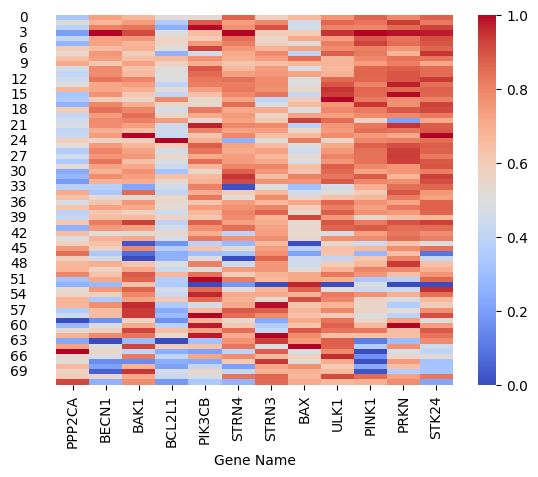

In [25]:
lut = {'Adjacent Kidney': 'darkgreen',
       'Metastasis CCRCC': 'darkred',
       'Primary Tumour CCRCC': 'olivedrab',
       'Primary Tumour Chromophobe': 'mediumblue',
       'Primary Tumour FH Def RCC': 'goldenrod',
       'Primary Tumour Oncocytic': 'purple',
       'Primary Tumour Papillary': 'palevioletred',
      }
row_colors = counts['Gene_Name'].map(lut)

ax = sns.heatmap(counts.drop(['Gene_Name'], axis=1), cmap = 'coolwarm')
#cmap = 'RdYlBu'/'coolwarm'/'bwr'/'seismic'

# plt.yticks([0,5,10,15,20,25,30,35,40,45,
#             50,55,60,65,70,75,80,85,90,95,
#             100,105,110,115,120,125
#            ],
#            ["X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1"
#            ]) #方案3，直接改變顯示

ax.tick_params(axis='y', which='major', pad=20.5, length=0) #y軸文字
ax.set_yticklabels(counts['Gene_Name'], rotation=0) # optionally use the groups as the tick labels

for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.055, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax.get_yaxis_transform(), clip_on=False)) #add row_color

plt.tight_layout()
plt.savefig("nature.png", format="pdf", facecolor='white', bbox_inches="tight")